In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

## Code: 270179

# Tarefa 3 - Neural Networks
Third assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This tarefa provides an exciting opportunity for students to put their knowledge acquired in class into practice, using neural networks to solve real-world problems in both classification and regression. Students will apply the concepts they have learned to build, train, and optimize neural networks, using a validation set to fine-tune hyperparameters. Students will also get used to generating important plots during training to analyse the models' behaviour. By the end of the project, students will have gained hands-on experience in implementing neural networks.

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Please enter your code in the designated areas of the notebook. You can create additional code cells to experiment with, but __make sure to place your final solutions where they are requested in the notebook.__
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).

## Notebook Overview:

1. [Regression](#Regression) (50%)
2. [Classification](#Classification) (50%)

# Regression

**Download from ECLASS**
- Tarefa_3_template.ipynb
- energy_efficiency.csv

**Dataset and Problem Description**

In this exercise, you will use the Energy Efficiency Prediction dataset. This dataset contains information about the energy efficiency of buildings based on eight features, including the size of the building, the orientation, and the type of building materials used. The dataset includes two targets: heating load and cooling load, which represent the energy required to heat and cool the building, respectively.

This dataset is useful for building neural networks that predict the energy efficiency of buildings, which is an important problem in the field of sustainable energy. The dataset has been used in several machine learning research papers and provides a challenging regression problem.

**Exercise Description: Energy Efficiency Prediction with Neural Networks**

In this exercise, you will use the Energy Efficiency Prediction dataset provided.
You will build and train a neural network to predict the heating load (column labelled y1 in the dataset) and the cooling load (column labelled y2) of a building based on its energy efficiency features. 


### To complete this exercise, you will write code to build and train neural networks for this problem:

1. Split the dataset into training, validation, and test sets, using a 70:15:15 ratio.

2. Use numpy, build a neural network that takes the energy efficiency features as input and predicts the heating and the cooling load as outputs. You will choose the number of neurons per layers and the number of layers, but each layer will have the same number of neurons. These two values must be input parameters for your neural network. That is, you can’t hard-code each layer, meaning that you will have to write code that is able to work with a variable number of layers and neurons. 

3. Code the forward pass and backpropagation algorithm to learn the weights of the neural network. Use the training set to train the neural network and update the weights using stochastic gradient descent. For the hidden layers use the sigmoid activation function. You will need to regularize your neural network using weight decay, that is, you will include a regularization term in your error function.

4. Monitor the training by plotting the training and validation losses across the epochs. 

The performance of your neural network will be different depending on the number of layers, number of neurons per layer and the value of λ that controls the amount of weight decay. You will experiment with 3 values of λ: 0 (no weight decay), 0.001 and 0.0001.
To choose the best network configuration and assess its performance you will:

1. Choose 3 possible values of number hidden layers (for example, 1 to 3) and 3 different values of neurons per layer (for example, 100, 200, and 300), but you can also choose different values. 

2. Calculate the loss for each configuration on the validation set.

3. Generate 3 heatmaps, one for each value of the λ regularization parameter, displaying the loss on the validation set by plotting the number of layers and number of neurons in a grid. This will help you visualise the best configuration for the neural network. 

4. Train your final model selecting the best combination of hyper-parameters and evaluate the final performance of the neural network using the test set and the root mean squared error as the metric and report that.

**Important:**
- Train for 50 epochs.
- Set the learning rate η to 0.01.


## Preparação dos Dados

In [3]:
np.random.seed(50)
df = pd.read_csv("energy_efficiency.csv")

y = df[["Y1", "Y2"]].to_numpy()
X = df.drop(columns=["Y1", "Y2"], axis=1).to_numpy()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5)

print(f"X: {X.shape} - y: {y.shape}")
print(f"X_train: {X_train.shape} - y_train: {y_train.shape}")
print(f"X_test: {X_test.shape} - y_test: {y_test.shape}")
print(f"X_val: {X_val.shape} - y_val: {y_val.shape}")

X: (768, 8) - y: (768, 2)
X_train: (537, 8) - y_train: (537, 2)
X_test: (115, 8) - y_test: (115, 2)
X_val: (116, 8) - y_val: (116, 2)


## Funções Auxiliares

In [6]:
def sigmoid(x):
    """
    Calcula a função sigmoide para uma entrada x.

    A função sigmoide é definida como 1 / (1 + exp(-x)), mapeando qualquer valor real para um valor no intervalo (0, 1).
    
    Parâmetros:
    x (float ou array-like): O valor ou array de valores para os quais calcular a sigmoide.
    
    Retorna:
    float ou numpy.ndarray: O valor da função sigmoide aplicado a x.
    """
    return 1 / (1 + np.exp(-x + 1e-20))

def dw_sigmoid(x):
    """
    Calcula a derivada da função sigmoide para uma entrada x.

    A derivada da função sigmoide é dada por sigmoid(x) * (1 - sigmoid(x)), que é usada para o cálculo do gradiente durante o treinamento de redes neurais.
    
    Parâmetros:
    x (float ou array-like): O valor ou array de valores para os quais calcular a derivada da sigmoide.
    
    Retorna:
    float ou numpy.ndarray: O valor da derivada da função sigmoide aplicado a x.
    """
    return sigmoid(x + 1e-20) * (1 - sigmoid(x + 1e-20))

def identidade(x):
    """
    Função identidade que retorna a própria entrada x.

    Essa função é útil quando nenhuma transformação é necessária e é frequentemente usada como função de ativação em certos tipos de redes neurais.
    
    Parâmetros:
    x (qualquer tipo): O valor ou objeto a ser retornado.
    
    Retorna:
    qualquer tipo: O mesmo valor de entrada x.
    """
    return x

In [8]:
def generate_w(dim_input, dim_output, num_hidden_layers, num_neuro) -> dict:
    """
    Gera os pesos iniciais para uma rede neural com uma camada de entrada, várias camadas ocultas e uma camada de saída.

    Os pesos são inicializados com valores aleatórios a partir de uma distribuição normal padrão.

    Parâmetros:
    dim_input (int): O número de neurônios na camada de entrada.
    dim_output (int): O número de neurônios na camada de saída.
    num_hidden_layers (int): O número de camadas ocultas.
    num_neuro (int): O número de neurônios em cada camada oculta.

    Retorna:
    dict: Um dicionário onde as chaves são os índices das camadas (0 para a camada de entrada, até `num_hidden_layers` para a camada de saída) e os valores são os arrays numpy contendo os pesos.
    """
    # OBS.: não estou guardando o w.T, apenas o w (é necessário transpor na hora de fazer os cálculos)
    W_dict = dict()

    # input layer
    W_dict[0] = np.random.randn(dim_input, num_neuro)

    # hidden layers
    for each_layer in range(1, num_hidden_layers):
        W_dict[each_layer] = np.random.randn(num_neuro, num_neuro)
    
    # output layer
    W_dict[num_hidden_layers] = np.random.randn(num_neuro, dim_output)

    return W_dict

def generate_b(dim_output, num_hidden_layers, num_neuro) -> dict:
    """
    Gera os vieses iniciais para uma rede neural com várias camadas ocultas e uma camada de saída.

    Os vieses são inicializados com valores aleatórios a partir de uma distribuição normal padrão.

    Parâmetros:
    dim_output (int): O número de neurônios na camada de saída.
    num_hidden_layers (int): O número de camadas ocultas.
    num_neuro (int): O número de neurônios em cada camada oculta.

    Retorna:
    dict: Um dicionário onde as chaves são os índices das camadas (0 a `num_hidden_layers` para as camadas ocultas e `num_hidden_layers` para a camada de saída) e os valores são os arrays numpy contendo os vieses.
    """
    B_dict = dict()

    # output layer
    B_dict[num_hidden_layers] = np.random.randn(dim_output, 1)

    # hidden layers
    for each_layer in range(num_hidden_layers):
        B_dict[each_layer] = np.random.randn(num_neuro, 1)

    return B_dict

## Forward Pass Function

In [9]:
# apenas para passar uma função como parâmetro
from typing import Callable

def forward_pass(X: np.ndarray, W_dict: dict, B_dict: dict, funcao_hidden: Callable, funcao_output: Callable) -> dict:
    """
    Realiza uma passagem para a frente (forward pass) em uma rede neural.

    Args:
        X (np.ndarray): Array numpy que representa os dados de entrada.
        W_dict (dict): Dicionário contendo as matrizes de pesos para cada camada da rede neural.
        B_dict (dict): Dicionário contendo os vetores de bias para cada camada da rede neural.
        funcao_hidden (Callable): Função de ativação a ser aplicada às camadas ocultas da rede.
        funcao_output (Callable): Função de ativação a ser aplicada à camada de saída da rede.

    Returns:
        dict: Um dicionário contendo as saídas de cada camada da rede após a passagem para a frente.
    """

    # dicionário para armazenar as saídas das camadas
    Z_dict = dict()
    Z_dict[0] = X
    
    # número de níveis da rede neural
    num_levels = len(W_dict.keys())

    for each_level in range(num_levels):
        # multiplicação do datapoint pelos pesos
        X = np.dot(W_dict[each_level].T, X)

        # adiciona os bias
        X = X + B_dict[each_level]

        # verifiaca se estamos tratando da camada oculta ou não para aplica diferentes funções de ativação
        if each_level != num_levels - 1:
            X = funcao_hidden(X)
        else:
            X = funcao_output(X)

        # salva no dicionário a saída de cada nível
        Z_dict[each_level + 1] = X

    return Z_dict

In [10]:
def fit_neural_network(X_train:np.ndarray, y_train:np.ndarray, X_val:np.ndarray, y_val:np.ndarray, n_lay:int, n_neu:int, learn_rate:float, n_iter:int, _lambda:float, atv_hidden:Callable, dw_atv:Callable) -> tuple:
    """
    Treina uma rede neural com uma quantidade especificada de camadas e neurônios.

    Parameters:
    X_train (np.ndarray): Dados de entrada para treinamento com forma (n_samples, n_features).
    y_train (np.ndarray): Rótulos de saída correspondentes com forma (n_samples, n_outputs).
    n_lay (int): Número de camadas ocultas na rede neural.
    n_neu (int): Número de neurônios em cada camada oculta.
    learn_rate (float): Taxa de aprendizado para ajuste dos pesos.
    n_iter (int): Número de iterações para treinamento.
    _lambda (float): Termo de regularização para evitar overfitting.
    atv_hidden (Callable): Função de ativação para as camadas ocultas.
    dw_atv (Callable): Derivada da função de ativação para cálculo do gradiente.

    Returns:
    tuple: Contém três elementos:
        - W_dict: Dicionário dos pesos treinados para cada camada.
        - B_dict: Dicionário dos bias treinados para cada camada.
        - historic_error: Lista do erro histórico ao longo das iterações.
    """
    
    dim_input = X_train.shape[1]
    dim_output = y_train.shape[1]

    Z_dict = dict()
    W_dict = generate_w(dim_input, dim_output, n_lay, n_neu)
    B_dict = generate_b(dim_output, n_lay, n_neu)

    historic_error = list()
    historic_error_val = list()

    Z_dict_train = forward_pass(X_train.T, W_dict, B_dict, atv_hidden, identidade)
    historic_error.append(np.sqrt(np.mean(np.power(y_train - Z_dict_train[n_lay + 1].T, 2))))

    Z_dict_val = forward_pass(X_val.T, W_dict, B_dict, atv_hidden, identidade)
    historic_error_val.append(np.sqrt(np.mean(np.power(y_val - Z_dict_val[n_lay + 1].T, 2))))

    for each_iter in range(n_iter):

        indices = np.random.permutation(len(X_train))
        X_shuffle = X_train[indices]
        y_shuffle = y_train[indices]
        
        for each_data_point in range(X_train.shape[0]):
            X_dp = X_shuffle[each_data_point].reshape(-1, 1)
            y_dp = y_shuffle[each_data_point].reshape(-1, 1)

            Z_dict = forward_pass(X_dp, W_dict, B_dict, atv_hidden, identidade)

            delta_W = (Z_dict[n_lay + 1] - y_dp)
            delta_B = (Z_dict[n_lay + 1] - y_dp)

            W_dict[n_lay] -= learn_rate * (Z_dict[n_lay] @ delta_W.T + _lambda * W_dict[n_lay])
            B_dict[n_lay] -= learn_rate * delta_B

            for each_layer in range(n_lay, 0, -1):
                sum = 0
                for each_neuron in range(Z_dict[each_layer].shape[0]):
                    sum += W_dict[each_layer][each_neuron] @ delta_W

                delta_W = dw_atv(Z_dict[each_layer]) * sum
                delta_B = dw_atv(B_dict[each_layer - 1])

                W_dict[each_layer - 1] -= learn_rate * (Z_dict[each_layer - 1] @ delta_W.T + _lambda * W_dict[each_layer - 1])
                B_dict[each_layer - 1] -= learn_rate * delta_B

        Z_dict_train = forward_pass(X_train.T, W_dict, B_dict, atv_hidden, identidade)
        historic_error.append(np.sqrt(np.mean(np.power(y_train - Z_dict_train[n_lay + 1].T, 2))))

        Z_dict_val = forward_pass(X_val.T, W_dict, B_dict, atv_hidden, identidade)
        historic_error_val.append(np.sqrt(np.mean(np.power(y_val - Z_dict_val[n_lay + 1].T, 2))))
    
    return W_dict, B_dict, historic_error, historic_error_val

## Loos Training X Validation

Nessa etapa, como exemplo, estou treinando uma rede neural mais simple, com apenas 5 camadas ocultas de 3 neurônios cada. Vou plotar tanto o erro do conjunto de treino, quanto o erro no conjunto de validação ao longo das épocas. Imagino, que essas configurações não sejam as ideais, tanto em número de neurônios e camadas ocultas, quanto na taxa de Weigth Decay, mas pode ser uma forma de verificar se tudo está funcionando bem.

In [11]:
W, B, train_e, val_e = fit_neural_network(X_train, y_train, X_val, y_val, 5, 3, 0.0001, 50, 0.01, sigmoid, dw_sigmoid)

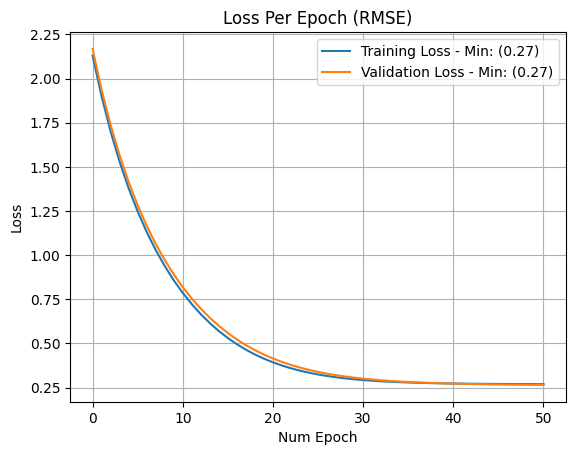

In [12]:
sns.lineplot(train_e, label=f"Training Loss - Min: ({min(train_e):.2f})")
sns.lineplot(val_e, label=f"Validation Loss - Min: ({min(val_e):.2f})")
plt.title("Loss Per Epoch (RMSE)")
plt.xlabel("Num Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## Heat Map

Nessa etapa, estou usando o conjunto de validação para avaliar a combinação de três hiperparâmetros diferentes: o número de camadas, o número de neurônios e a taxa do Weigth Decay. O número de camadas ocultas (hidden layers) está variando entre 1, 2 e 3. O número de neurônios por camada oculta entre 10, 50 e 100. E a taxa de Weigth Decay dentro dos valores pedidos na tarefa: 0, 0.001 e 0.0001. No meu gráfico, estou plotando o erro mínimo encontrado pela combinação desses parâmetros para estimar qual é melhor. Quanto ao Learning Rate, está igual para todos, visto que foi solicitado no PDF da tarefa.

OBS. 1: Usei apenas o conjunto de validação para gerar o heat map.

C:\Users\mathe\AppData\Local\Temp\ipykernel_16300\445621489.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-20))


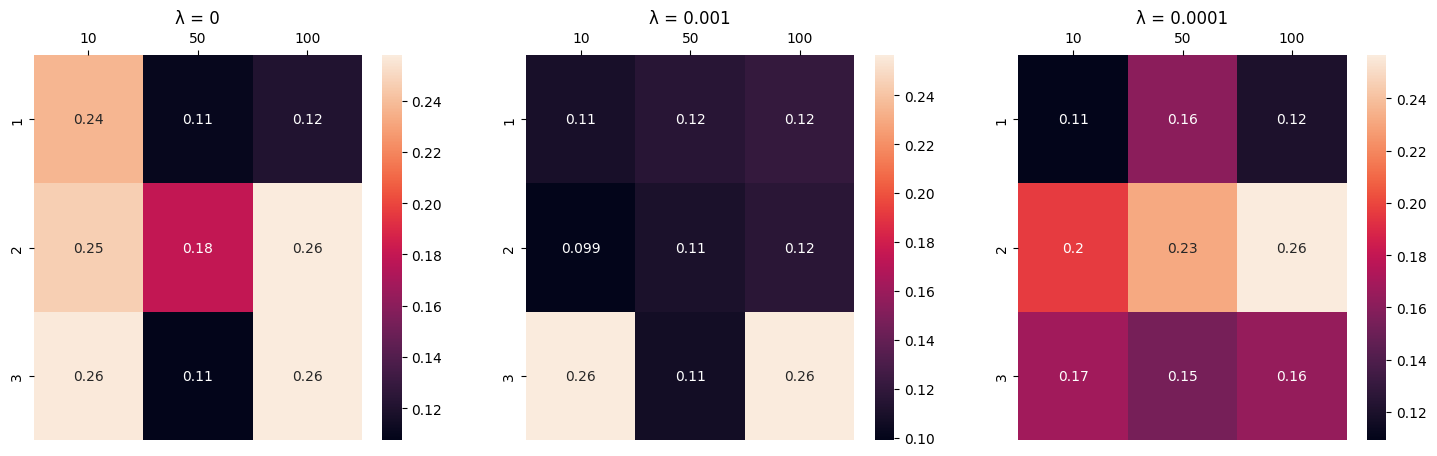

In [13]:
arrays = [np.zeros((3,3)), np.zeros((3,3)), np.zeros((3,3))]
lambdas = [0, 0.001, 0.0001]
index = [1, 2, 3]
colums = [10, 50, 100]

for each_row in range(3):
    for each_column in range(3):
        arrays[0][each_row, each_column] = min(fit_neural_network(X_train, y_train, X_val, y_val, each_row + 1, colums[each_column], 0.01, 50, 0.1, sigmoid, dw_sigmoid)[3])
        arrays[1][each_row, each_column] = min(fit_neural_network(X_train, y_train, X_val, y_val, each_row + 1, colums[each_column], 0.01, 50, 0.001, sigmoid, dw_sigmoid)[3])
        arrays[2][each_row, each_column] = min(fit_neural_network(X_train, y_train, X_val, y_val, each_row + 1, colums[each_column], 0.01, 50, 0.0001, sigmoid, dw_sigmoid)[3])

df0 = pd.DataFrame(arrays[0], index=index, columns=colums)
df0001 = pd.DataFrame(arrays[1], index=index, columns=colums)
df00001 = pd.DataFrame(arrays[2], index=index, columns=colums)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].xaxis.tick_top()
axes[1].xaxis.tick_top()
axes[2].xaxis.tick_top()

axes[0].set_title("λ = 0")
axes[1].set_title("λ = 0.001")
axes[2].set_title("λ = 0.0001");

sns.heatmap(df0, ax=axes[0], annot=True)
sns.heatmap(df0001, ax=axes[1], annot=True)
sns.heatmap(df00001, ax=axes[2], annot=True);

## Veredito 

Acredito que o resultado está aceitável, mas é possível notar algumas ocilações um pouco mais brutas. Fazendo testes que não vieram para o Jupyter Notebook, percebi que com taxas de aprendizados diferentes (menores), levam a uma curva bem mais suave. Porém, como foi pedido que o learning rate fosse fixado em 0.01, vou manter assim.

In [14]:
W, B, train_e, test_e = fit_neural_network(X_train, y_train, X_test, y_test, 2, 10, 0.01, 50, 0.001, sigmoid, dw_sigmoid)

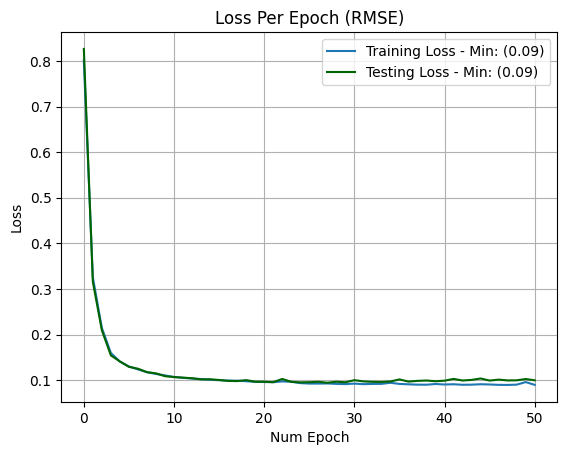

In [15]:
sns.lineplot(train_e, label=f"Training Loss - Min: ({min(train_e):.2f})")
sns.lineplot(test_e, label=f"Testing Loss - Min: ({min(test_e):.2f})", color="darkgreen")
plt.title("Loss Per Epoch (RMSE)")
plt.xlabel("Num Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Classification

**Download the data from ECLASS**
- drug_side_effects.csv
- drug_features.csv

**Dataset description:**

In this exercise, you will build and train a neural network to predict the occurrence of drug side effects. The dataset is derived from the SIDER dataset, containing relatively common side effects that can occur for at least 50 drugs. This produces a total of 740 drugs and 256 side effects. The features represent various molecular properties, including molecular weight, number of atoms, number of rings, number of hydrogen bond donors and acceptors, logP, topological polar surface area (TPSA), number of rotatable bonds, number of aromatic rings, number of aliphatic rings, number of saturated rings, and number of heteroatoms. 

**Remember that each drug can cause many side effects, not only one.** 

*Feel free to explore the dataset and check the potential side effects of popular medications!*

### To complete this exercise, follow these steps:

1. Load the dataset and split it into training, validation, and test sets, using an 80:10:10 ratio. 

2. Standardize the features by removing the mean and scaling to unit variance. To do this, perform the following for each feature (column) in the dataset:
    - Calculate the mean and standard deviation across the training set for that feature.
    - Subtract the mean from each value in that feature and divide by the standard deviation.
    - Apply the same transformation to the validation and test sets using the mean and standard deviation calculated from the training set.

**Observation:** you need to code this part, you’re not allowed to use scikit-learn.

*Normalization of features is important for neural networks because:*
- *It ensures that all features have the same scale, preventing certain features from dominating the learning process due to their larger magnitude.*
- *It improves the numerical stability of the training process, making the neural network less sensitive to the choice of learning rate and other hyperparameters.*

3. Build a neural network using NumPy that takes in the features as input and predicts the occurrence of side effects. You will choose the number of neurons per layer and the number of layers. You will provide this information as an input list where the length of the list determines the number of hidden layers, and each element is the number of neurons of that hidden layer. For example, an array `layers = [64,128,256]` should produce a network with 4 layers, with 3 hidden layers with 64, 128, and 256 neurons each. For the hidden layers use the sigmoid activation function. You will need to regularize your neural network using weight decay, that is, you will include a regularization term in your error function.

4. Code the forward pass and backpropagation algorithm to learn the weights of the neural network. Use the training set to train the neural network and update the weights using stochastic gradient descent. Don’t forget about the biases. 

5. Monitor the training by plotting the training and validation losses across the epochs.

	**Observation:** make sure the loss goes down during training, acceptable values are within 0.2 – 2.8 approximately. These values depend on the choice of the different hyperparameters. Test only sensible values taking into account the dataset, i.e., number of features, drugs, side effects. 

The performance of your neural network will be different depending on the number of layers, number of neurons per layer and the value of λ that controls the amount of weight decay. You will experiment with 3 values of λ: 0 (no weight decay), 1 and 0.01.
To choose the best network configuration and assess its performance you will:

1. For each value of λ, select 3 different layer configurations (note that in this exercise, the number of neurons per layer does not require to be the same for each layer).
2. Calculate the loss for each configuration on the validation set.
3. At the end of this process, you should be left with 9 loss values (one for each configuration). Train your final model selecting the best combination of hyper-parameters and evaluate the final performance of the neural network using the test set and the Area Under the ROC Curve (AUROC) with the function provided in the Jupyter notebook. 
	
	*Observation: don’t expect impressive AUROC values, as this is a highly complex problem that can’t be solved easily with a simple neural network with standard features. Expect values in the range (0.55-0.75).*

**Important:**
- Train for 50 epochs.
- Set the learning rate η to 0.01.



## Conjunto de Dados

Nesse primeiro momento, apenas estou preparando os dados. Note que, além de transformar para um array numpy, eu removi a coluna dos nomes para evitar futuros erros. As dimensões dos datasets estão detalhadas no output da célula.

In [16]:
X_2 = pd.read_csv("drug_features.csv").drop(columns=["name"], axis=1).to_numpy()
y_2 = pd.read_csv("drug_side_effects.csv").drop(columns=["name"], axis=1).to_numpy()

X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X_2, y_2, test_size=0.2)
X_test_2, X_val_2, y_test_2, y_val_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5)

print(f"X: {X_2.shape} - y: {y_2.shape}")
print(f"X_train: {X_train_2.shape} - y_train: {y_train_2.shape}")
print(f"X_test: {X_test_2.shape} - y_test: {y_test_2.shape}")
print(f"X_val: {X_val_2.shape} - y_val: {y_val_2.shape}")

X: (740, 12) - y: (740, 256)
X_train: (592, 12) - y_train: (592, 256)
X_test: (74, 12) - y_test: (74, 256)
X_val: (74, 12) - y_val: (74, 256)


## Normalização

Conforme foi pedido, normalizei todas as colunas de todos os datasets. Todos da mesma maneira: subtraindo a média e dividindo pelo desvio padrão (ambos referentes à coluna equivalente no dataset de treino).

In [17]:
list_of_means = list()
list_of_std = list()

for each_column in range(X_train_2.shape[1]):

    X_aux = X_train_2[:,each_column]
    mean = np.mean(X_aux)
    std = np.std(X_aux)
    
    X_train_2[:,each_column] = (X_train_2[:,each_column] - mean)/std
    X_test_2[:,each_column] = (X_test_2[:,each_column] - mean)/std
    X_val_2[:,each_column] = (X_val_2[:,each_column] - mean)/std

## Funções Auxiliares

Nesse momento, eu defini algumas função que me auxiliaram na construção do modelo. Como o funcionamento dos pesos era diferente da primeira parte, tive que refazer as funções que inicializam os pesos. Além disso, criei uma nova função de erro. O restante das funções auxiliares eu usei da primeira parte, como o forward_pass e a sigmoid.

In [19]:
def cross_entropy_loss(y, t):
    """
    Calcula a perda de entropia cruzada entre as previsões e os rótulos verdadeiros.

    A entropia cruzada é uma medida de erro usada em tarefas de classificação, especialmente em redes neurais.

    Parâmetros:
    y (numpy.ndarray): As previsões da rede, com valores entre 0 e 1.
    t (numpy.ndarray): Os rótulos verdadeiros, com valores binários (0 ou 1).

    Retorna:
    float: A perda de entropia cruzada média entre as previsões e os rótulos.
    """
    y = np.clip(y, 1e-15, 1 - 1e-15)
    ce = -np.mean(t * np.log(y) + (1 - t) * np.log(1 - y))
    return ce

def generate_b_2(dim_output, list_hiden_layers):
    """
    Gera os vieses iniciais para uma rede neural com uma lista especificada de camadas ocultas e uma camada de saída.

    Os vieses são inicializados com valores aleatórios a partir de uma distribuição normal padrão.

    Parâmetros:
    dim_output (int): O número de neurônios na camada de saída.
    list_hiden_layers (list of int): Uma lista onde cada elemento representa o número de neurônios em uma camada oculta.

    Retorna:
    dict: Um dicionário onde as chaves são os índices das camadas (0 a `num_hidden_layers` para as camadas ocultas e `num_hidden_layers` para a camada de saída) e os valores são os arrays numpy contendo os vieses.
    """
    Temp_B_dict = dict()
    num_hidden_layers = len(list_hiden_layers)
    for each_hiden_layer in range(num_hidden_layers):
        Temp_B_dict[each_hiden_layer] = np.random.randn(list_hiden_layers[each_hiden_layer], 1)

    Temp_B_dict[num_hidden_layers] = np.random.randn(dim_output, 1)

    return Temp_B_dict

def generate_w_2(dim_input, dim_output, list_hiden_layers):
    """
    Gera os pesos iniciais para uma rede neural com uma camada de entrada, uma lista especificada de camadas ocultas e uma camada de saída.

    Os pesos são inicializados com valores aleatórios a partir de uma distribuição normal padrão.

    Parâmetros:
    dim_input (int): O número de neurônios na camada de entrada.
    dim_output (int): O número de neurônios na camada de saída.
    list_hiden_layers (list of int): Uma lista onde cada elemento representa o número de neurônios em uma camada oculta.

    Retorna:
    dict: Um dicionário onde as chaves são os índices das camadas (0 para a camada de entrada, até `num_hidden_layers` para a camada de saída) e os valores são os arrays numpy contendo os pesos.
    """
    Temp_W_dict = dict()
    num_hidden_layers = len(list_hiden_layers)
    Temp_W_dict[0] = np.random.randn(dim_input, list_hiden_layers[0])

    for each_hiden_layer in range(num_hidden_layers - 1):
        Temp_W_dict[each_hiden_layer + 1] = np.random.randn(list_hiden_layers[each_hiden_layer], list_hiden_layers[each_hiden_layer + 1])

    Temp_W_dict[num_hidden_layers] = np.random.randn(list_hiden_layers[each_hiden_layer + 1], dim_output)

    return Temp_W_dict

## Algorítimo 

Nesse ponto, eu de fato desenvolvo o modelo. O código está comentado na medida do possível. Imagino que me fiz entendível. Mas basicamente a ideia é ir atualizando os pesos, e ir salvando o erro para todos os datasets a cada ataulização. No final de tudo, tanto os pesos, quanto o caminho dos erros são retornados pela função. 

In [20]:
def fit_neural_network_2(X_train:np.ndarray, y_train:np.ndarray, X_val:np.ndarray, y_val:np.ndarray, X_test:np.ndarray, y_test:np.ndarray,
                         list_layers:list, learn_rate:float, n_iter:int, _lambda:float, atv_hidden:Callable, dw_atv:Callable) -> tuple:
    """
    Treina uma rede neural usando um algoritmo de descida de gradiente estocástica.

    Parâmetros:
    X_train (np.ndarray): Dados de entrada de treinamento.
    y_train (np.ndarray): Rótulos de treinamento.
    X_val (np.ndarray): Dados de entrada de validação.
    y_val (np.ndarray): Rótulos de validação.
    X_test (np.ndarray): Dados de entrada de teste.
    y_test (np.ndarray): Rótulos de teste.
    list_layers (list): Lista definindo a arquitetura das camadas ocultas.
    learn_rate (float): Taxa de aprendizado para a descida de gradiente.
    n_iter (int): Número de iterações para o loop de treinamento.
    _lambda (float): Parâmetro de regularização.
    atv_hidden (Callable): Função de ativação para as camadas ocultas.
    dw_atv (Callable): Derivada da função de ativação para a retropropagação.

    Retorna:
    tuple: Contém os pesos finais (W_dict), vieses (B_dict), 
           histórico de erros de treinamento (historic_error), histórico de erros de validação (historic_error_val),
           histórico de erros de teste (historic_error_test), e as saídas finais da passagem direta para 
           os conjuntos de treinamento (Z_dict_train), validação (Z_dict_val) e teste (Z_dict_test).
    """
    # dimensão de entrada e saída
    dim_input = X_train.shape[1]
    dim_output = y_train.shape[1]

    # número de camadas ocultas
    n_lay = len(list_layers)

    # incializa os dicionários dos pesos, dos bias e do resultado final de cada camada
    Z_dict = dict()
    W_dict = generate_w_2(dim_input, dim_output, list_layers)
    B_dict = generate_b_2(dim_output, list_layers)

    # inicializa listas que vão armazenar o histórico de erro do conjunto de treino (vai guiar o aprendizado)
    # e dos conjuntos de teste e validação ao longo da atualização dos pesos e dos bias
    historic_error = list()
    historic_error_val = list()
    historic_error_test = list()

    # loop para percorrer o dataset inteiro
    for each_iter in range(n_iter):

        # forward pass inicial (com parâmetros aleatórios) para ambos os conjuntos 
        Z_dict_train = forward_pass(X_train.T, W_dict, B_dict, atv_hidden, atv_hidden)
        historic_error.append(cross_entropy_loss(Z_dict_train[n_lay + 1].T, y_train))

        Z_dict_val = forward_pass(X_val.T, W_dict, B_dict, atv_hidden, atv_hidden)
        historic_error_val.append(cross_entropy_loss(Z_dict_val[n_lay + 1].T, y_val))

        Z_dict_test = forward_pass(X_test.T, W_dict, B_dict, atv_hidden, atv_hidden)
        historic_error_test.append(cross_entropy_loss(Z_dict_test[n_lay + 1].T, y_test))

        # shuffle dos dados para evitar overfitting
        indices = np.random.permutation(len(X_train))
        X_shuffle = X_train[indices]
        y_shuffle = y_train[indices]

        # loop de backpropagation
        for each_data_point in range(X_train.shape[0]):
            X_dp = X_shuffle[each_data_point].reshape(-1, 1)
            y_dp = y_shuffle[each_data_point].reshape(-1, 1)

            # forward pass para o datapoint
            Z_dict = forward_pass(X_dp, W_dict, B_dict, atv_hidden, atv_hidden)

            # deltas do output
            delta_W = (Z_dict[n_lay + 1] - y_dp) * dw_atv(Z_dict[n_lay + 1])
            delta_B = (Z_dict[n_lay + 1] - y_dp) * dw_atv(Z_dict[n_lay + 1])

            # backpropagation do output
            W_dict[n_lay] -= learn_rate * ((Z_dict[n_lay] @ delta_W.T + _lambda * W_dict[n_lay]))
            B_dict[n_lay] -= learn_rate * delta_B

            # back propagation das camadas ocultas 
            for each_layer in range(n_lay, 0, -1):
                sum = 0
                for each_neuron in range(Z_dict[each_layer].shape[0]):
                    sum += W_dict[each_layer][each_neuron] @ delta_W

                delta_W = dw_atv(Z_dict[each_layer]) * sum
                delta_B = dw_atv(B_dict[each_layer - 1])

                W_dict[each_layer - 1] -= learn_rate * (Z_dict[each_layer - 1] @ delta_W.T + _lambda * W_dict[each_layer - 1])
                B_dict[each_layer - 1] -= learn_rate * delta_B

    # forward pass final com os pesos e bias atualizados
    Z_dict_train = forward_pass(X_train.T, W_dict, B_dict, atv_hidden, atv_hidden)
    historic_error.append(cross_entropy_loss(Z_dict_train[n_lay + 1].T, y_train))

    Z_dict_val = forward_pass(X_val.T, W_dict, B_dict, atv_hidden, atv_hidden)
    historic_error_val.append(cross_entropy_loss(Z_dict_val[n_lay + 1].T, y_val))

    Z_dict_test = forward_pass(X_test.T, W_dict, B_dict, atv_hidden, atv_hidden)
    historic_error_test.append(cross_entropy_loss(Z_dict_test[n_lay + 1].T, y_test))

    return W_dict, B_dict, historic_error, historic_error_val, historic_error_test, Z_dict_train, Z_dict_val, Z_dict_test


## Monitorando o Aprendizado

Treinando a rede neural para a configuração de camadas propostas, com o learning rate proposto, 50 epochs e sem weigth dacay, tivemos o resultado plotado abaixo. Na minha visão, está satisfatório. Conversando com alguns colegas e com o monitor, a maioria das pessoas consegui um resultado semelhante. 

In [21]:
W, B, err_train, err_val, err_test, Z_train, Z_val, Z_test  = fit_neural_network_2(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2, [64, 128, 256], 0.01, 50, 0, sigmoid, sigmoid)

C:\Users\mathe\AppData\Local\Temp\ipykernel_16300\445621489.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-20))


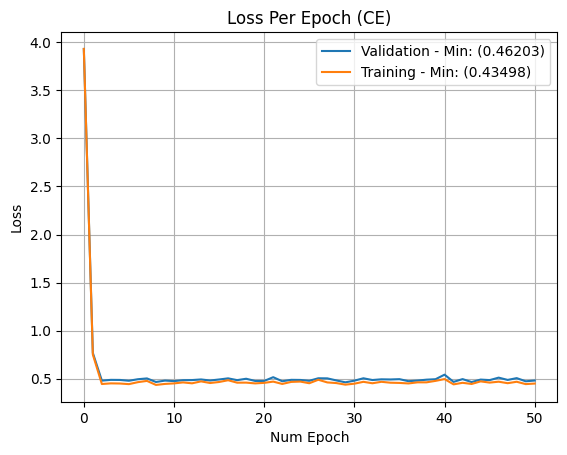

In [22]:
sns.lineplot(err_val, label=f"Validation - Min: ({min(err_val):.5f})")
sns.lineplot(err_train, label=f"Training - Min: ({min(err_train):.5f})")
plt.title("Loss Per Epoch (CE)")
plt.xlabel("Num Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## Validação do Weigth Decay

Vou gerar três configurações de camada e cruzar com os três valores de weigth decay proposto, gerar um heatmap com o erro mínimo para o conjunto de validação em cada uma das configurações e, então, escolher a melhor configuração entre as nove para calcular a AUROC.

In [45]:
config1 = [64, 128, 256]
config2 = [100, 100, 100]
config3 = [10, 20, 30, 40, 50]

WD1 = 0
WD2 = 0.01
WD3 = 1

lista_camadas = [config1, config2, config3]
lista_wd = [WD1, WD2, WD3]

heatmap_matrix = np.zeros((3,3))

for i in range(3):
    for j in range(3):
        heatmap_matrix[i, j] = min(fit_neural_network_2(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2, lista_camadas[j], 0.01, 50, lista_wd[i], sigmoid, sigmoid)[3])

C:\Users\mathe\AppData\Local\Temp\ipykernel_16300\445621489.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-20))


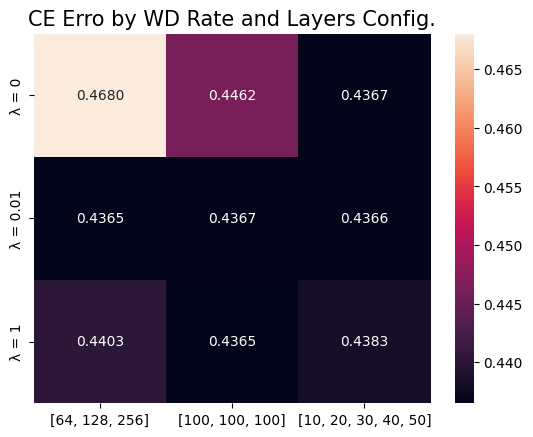

In [47]:
df = pd.DataFrame(heatmap_matrix, index=["λ = 0", "λ = 0.01", "λ = 1"], columns=["[64, 128, 256]", "[100, 100, 100]", "[10, 20, 30, 40, 50]"])
sns.heatmap(df, annot=True, fmt='.4f')
plt.title("CE Erro by WD Rate and Layers Config.", fontsize=15);

## AUROC

Agora que descobrimos a configuração que melhor funciona, vou treinar uma nova rede neural com os teóricos melhores parâmetros, fazer o forward pass com os pesos e bias treinados para o conjunto de teste e, então, calcular a AUROC.

In [48]:
W_optimo, B_optimo, err_train, err_val, err_test, Z_train, Z_val, Z_test = fit_neural_network_2(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2, [64, 128, 256], 0.01, 50, 0.01, sigmoid, sigmoid)
Z_test = forward_pass(X_test_2.T, W_optimo, B_optimo, sigmoid, sigmoid)

C:\Users\mathe\AppData\Local\Temp\ipykernel_16300\445621489.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-20))


In [49]:
auroc = roc_auc_score(y_test_2.T, Z_test[4])
print(auroc)

0.768303154031847
